# Analysis

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fraud = pd.read_csv('../data/data.csv')

Inspect Data

In [3]:
types = fraud.dtypes

In [4]:
rsample = fraud.sample(frac=1)

In [5]:
#print(rsample)
#print(type(rsample))
sample = rsample.head()
n = len(fraud)

In [6]:
print(sample, "\n")
print("Length: ", n, "\n") # 6,362,620 rows
print("Types: ", types)

         step      type     amount     nameOrig  oldbalanceOrg  \
2860701   227   PAYMENT   41464.80   C917192543            0.0   
5840673   402   CASH_IN  275111.14   C426190816        30046.0   
2045048   181  CASH_OUT   82425.78   C635870600       160577.0   
1483073   141   PAYMENT   10175.03  C1901563531        60897.0   
3615575   273   PAYMENT   16205.02  C1358923493         5081.0   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
2860701            0.00  M1330516141            0.00            0.00        0   
5840673       305157.14  C1081640579       463321.54       188210.40        0   
2045048        78151.22  C2098748440       223421.63       305847.41        0   
1483073        50721.97  M1173634110            0.00            0.00        0   
3615575            0.00   M463018440            0.00            0.00        0   

         isFlaggedFraud  
2860701               0  
5840673               0  
2045048               0  
1483073     

In [7]:
# Description
stats = fraud.describe().apply(lambda s: s.apply('{0:.2f}'.format))

In [8]:
print(stats)

             step       amount oldbalanceOrg newbalanceOrig oldbalanceDest  \
count  6362620.00   6362620.00    6362620.00     6362620.00     6362620.00   
mean       243.40    179861.90     833883.10      855113.67     1100701.67   
std        142.33    603858.23    2888242.67     2924048.50     3399180.11   
min          1.00         0.00          0.00           0.00           0.00   
25%        156.00     13389.57          0.00           0.00           0.00   
50%        239.00     74871.94      14208.00           0.00      132705.66   
75%        335.00    208721.48     107315.18      144258.41      943036.71   
max        743.00  92445516.64   59585040.37    49585040.37   356015889.35   

      newbalanceDest     isFraud isFlaggedFraud  
count     6362620.00  6362620.00     6362620.00  
mean      1224996.40        0.00           0.00  
std       3674128.94        0.04           0.00  
min             0.00        0.00           0.00  
25%             0.00        0.00           0.00

## Plots
* https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

In [68]:
# Filtered Data
flagged_rows = fraud[fraud.isFlaggedFraud == 1]
unflagged_rows=fraud[fraud.isFlaggedFraud == 0]
fraud_rows = fraud[fraud.isFraud == 1]
notfraud_rows = fraud[fraud.isFraud == 0]

In [46]:
flagged_rows.head()
unflagged_rows.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Amount vs Steps
* Seems to be a sharp cutoff in amount among all steps
* huge spike of amount around ~300 steps

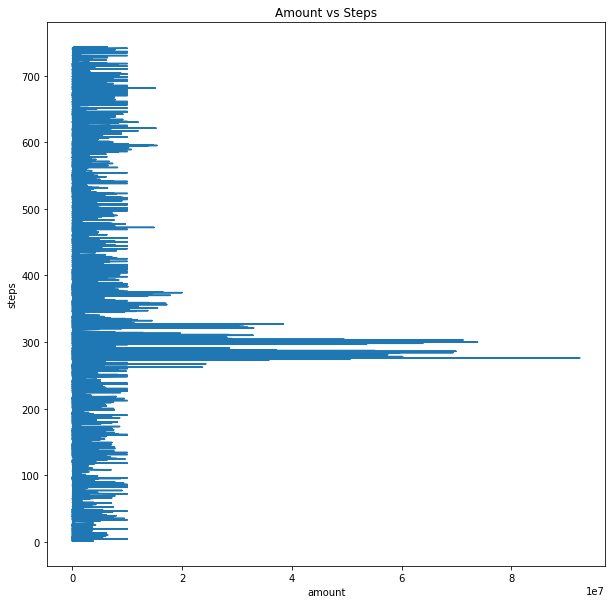

In [48]:
# Amount vs Steps
fig1, ax1 = plt.subplots(figsize=(10, 10)) # width, height
ax1.plot(fraud.amount, fraud.step);
ax1.set(xlabel='amount', ylabel='steps', title='Amount vs Steps')
fig1.savefig('AmountStep.png')

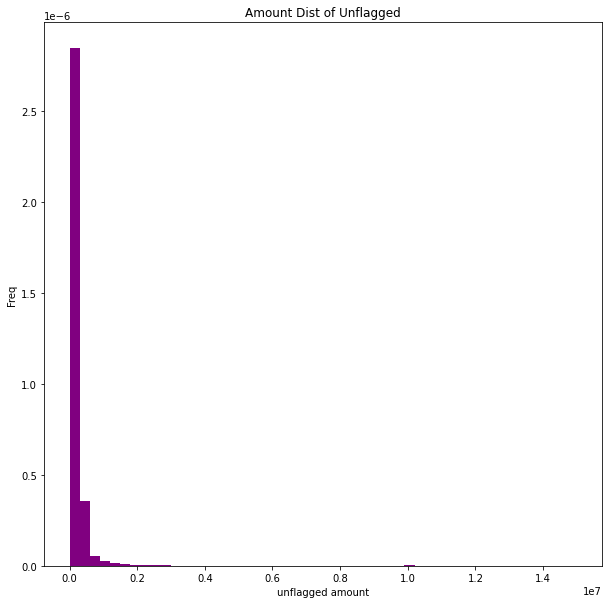

In [64]:
# Range
#bin_range = range(min(unflagged_rows), max(unflagged_rows) + 50, 50)

# Amout hist for nonflagged
fig2, ax2 = plt.subplots(figsize=(10,10))
ax2.hist(unflagged_rows.amount, bins=50, range=[0, 15000000], density=True, color="Purple")
ax2.set(xlabel='unflagged amount', ylabel='Freq', title='Amount Dist of Unflagged')
fig2.savefig('AmountDistUnflagged.png')

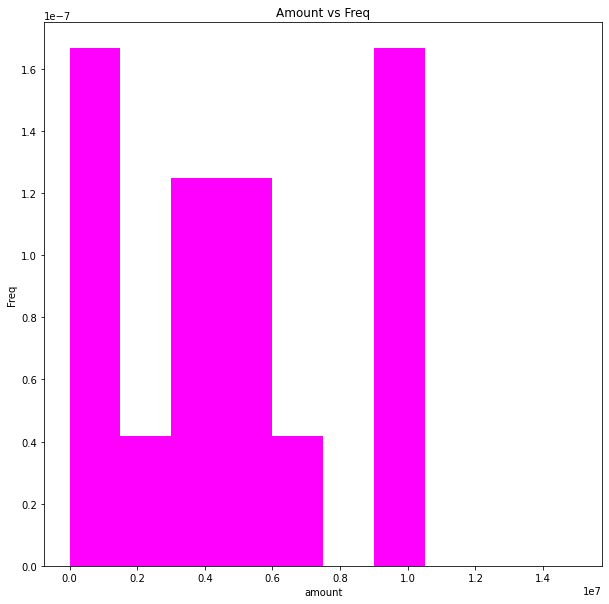

In [67]:
# Amount hist for Flagged
# rsample.plot(x='amount', y='isFlaggedFraud', kind="hist")
fig3, ax3 = plt.subplots(figsize=(10, 10)) # width, height
ax3.hist(flagged_rows.amount, bins=10, range=[0, 15000000], density=True, cumulative=False, color="Magenta")
ax3.set(xlabel='amount', ylabel='Freq', title='Amount vs Freq')
#ax.set_xlim([0, 20000000])
fig3.savefig('AmountDistFlagged.png')

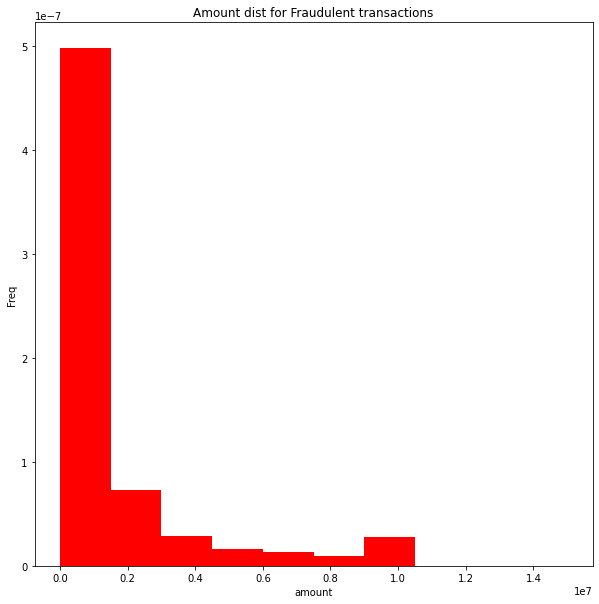

In [70]:
# Amount hist for Fraudulent transactions
fig4, ax4 = plt.subplots(figsize=(10,10))
ax4.hist(fraud_rows.amount, bins=10, range=[0, 15000000], density=True, color="Red")
ax4.set(xlabel='amount', ylabel='Freq', title='Amount dist for Fraudulent transactions')
fig4.savefig('AmountDistFraud.png')

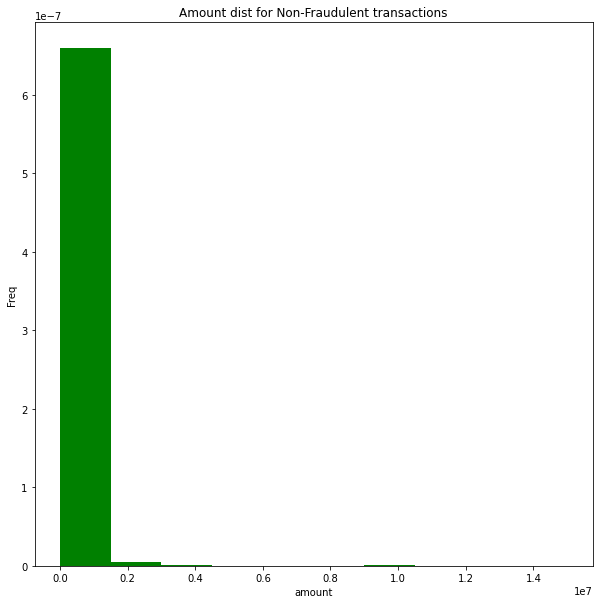

In [71]:
# Amount hist for Non-Fraudulent transactions
fig5, ax5 = plt.subplots(figsize=(10,10))
ax5.hist(notfraud_rows.amount, bins=10, range=[0, 15000000], density=True, color="Green")
ax5.set(xlabel='amount', ylabel='Freq', title='Amount dist for Non-Fraudulent transactions')
fig5.savefig('AmountDistNotFraud.png')

From these plots, it can be seen that potential and actual fraudulent transactions, if the amount is higher than
a certain amount, then it is most likely a fraudulent.  That amount seems to be around .175*10^7

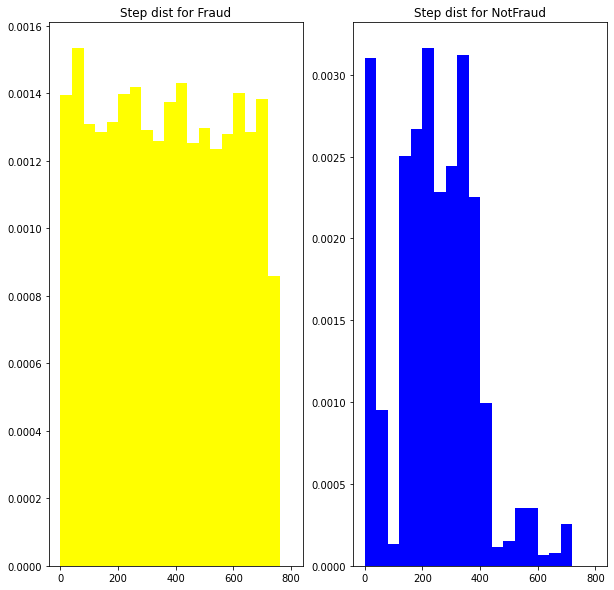

In [79]:
# Range
range6 =[0, 800]

# Step distribution for non and fraudulent transactions
fig6, ((ax61, ax62)) = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax61.hist(fraud_rows.step, bins=20, range=range6, density=True, color="yellow")
ax62.hist(notfraud_rows.step, bins=20, range=range6, density=True, color="blue")
ax61.set(title="Step dist for Fraud")
ax62.set(title="Step dist for NotFraud")
fig6.savefig('StepDists.png')

We see that Fraud also as a higher chance to have more steps.

High steps + High amount == Higher chance to be Fraud


#### Possible points of analysis
* newbalanceOrg going to 0
* previously fraudulent merchant/customers
* oldbalanceDeset raising from 0
* what types is fraud most likely to be

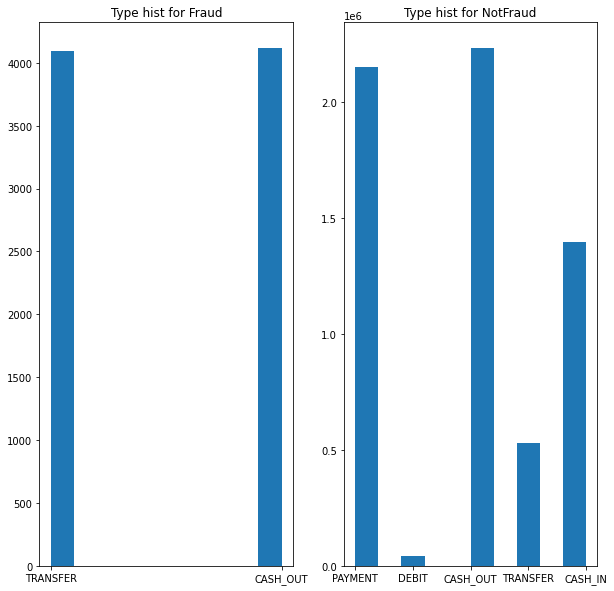

In [81]:
# Types
fig7, ((ax71, ax72)) = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
ax71.hist(fraud_rows.type)
ax72.hist(notfraud_rows.type)
ax71.set(title="Type hist for Fraud")
ax72.set(title="Type hist for NotFraud")
fig7.savefig('TypeHist.png')

Most to all fraudulent transactions are either TRANSFER or CASH_OUT

[Text(0.5, 1.0, 'NotFraud')]

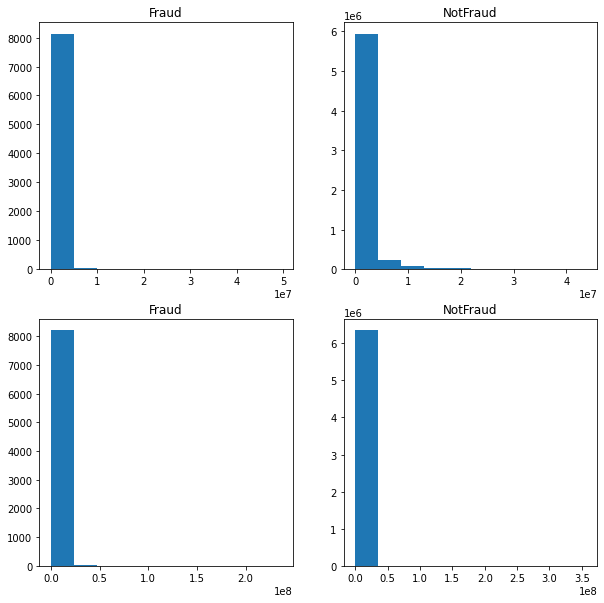

In [89]:
# newBalanceOrig, newbalanceDest
fig8, ((ax81, ax82), (ax83, ax84)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax81.hist(fraud_rows.newbalanceOrig)
ax82.hist(notfraud_rows.newbalanceOrig)
ax81.set(title="Fraud")
ax82.set(title="NotFraud")
ax83.hist(fraud_rows.newbalanceDest)
ax84.hist(notfraud_rows.newbalanceDest)
ax83.set(title="Fraud")
ax84.set(title="NotFraud")
#fig8.savefig('TypeHist.png')

# Dataset Description
* 6.3 million rows
* 11 features

### Columns
* Numerical: **step**: maps unit of time in real world (steps to hours)
* Categorical: **type**: CASH-IN, CASH-OUT, DEBIT, PAYMENT, TRANSFER (discrete)
* Numerical: **amount**: amount of transaction in local currency
* ID: **nameOrig**: customer who started transaction (Customer ID, Merchant ID)
* Numerical: oldbalanceOrg: initial balance before transaction
* Numerical: **newbalanceOrig**: new balance after transaction
* ID: nameDest: customer who is recipient of the transaction
* Numerical: oldbalanceDest: initial balance recipient before transaction (no info for merchants)
* Numerical: newbalanceDest: new balance recipient after transaction (no info for merchants
#### Last two
* Bool (Target): isFraud: is a fraudulent transaction (fraud if agent aims to emptying funds into another account and cashing out)
* Bool: isFlaggedFraud: any massive transfers or illegal attempts

# Data preparation and training
* ~~Prep NA~~ (no null values in this dataset)
* Get feature matrix and labels
* Train
* Test
* Evaluate

In [104]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

In [97]:
data = pd.read_csv('../data/data.csv')

* choose right model and hyp from sklearn flowchart
* Categorizing: with labeled Data: 6m samples:
-> SGD Classifier and kernel approx

In [120]:
from sklearn.linear_model import SGDClassifier
# Create Pipeline

# Define Features and Transformer
categorical_features =["type"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
     ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

numerical_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean", fill_value="missing"))
])

# id_features = ['nameOrig', 'nameDest']
# id_transformer = Pipeline(step=[
#     ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
#     ("onehot")
# ])

#flag_feature = ["isFlaggedFraud"]
#flag_transformer = Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("num", numerical_transformer, numerical_features)
    ]
)

clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", SGDClassifier())
])

In [121]:
# Feature Matrix
X = fraud.drop("isFraud", axis=1).drop("nameDest", axis=1).drop("nameOrig", axis=1)
# remove IDs for now


# Labels
y = fraud["isFraud"]

print("X: ", X.head())
print("y: ", y.head())

X:     step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFlaggedFraud  
0             0.0               0  
1             0.0               0  
2             0.0               0  
3             0.0               0  
4             0.0               0  
y:  0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64


In [122]:
#Split into sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [123]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['type']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing'))]),
                                                  ['step', 'amount',
                                                   'oldbalanceOrg'

In [124]:
clf.score(X_test, y_test)

0.9972644916716699

* Results without the ID columns returns 99.7% accurate
* Optimize hyperparameters with searchCV

In [129]:
'''
from sklearn.model_selection import RandomizedSearchCV
grid = {
    "loss": ['hinge', 'modified_huber', 'log'],
    "penalty": ['l2', 'l1', 'elasticnet'],
    "max_iter": [1,5,10,15]
}
rs_clf = RandomizedSearchCV(
    estimator=clf,
    param_distributions=grid,
    n_iter=10
)
# Run RS CLF
rs_clf.fit(X_train, y_train)
print(rs_clf.best_params)
best = rs_clf.best_params_
'''

## Try other model:

In [132]:
from sklearn.svm import LinearSVC
clf2 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearSVC())
])

In [133]:
clf2.fit(X_train, y_train)

c:\gith\mrevanishere\fraud-analysis\venv\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['type']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing'))]),
                                                  ['step', 'amount',
                                                   'oldbalanceOrg'

In [134]:
clf2.score(X_test, y_test)

0.9883153480798791

* LinearSVC took too long because >100k samples
* 98.8% accuracy

## Evaluate both models

In [135]:
y_preds = clf.predict(X_test)
y_preds2 = clf2.predict(X_test)

In [140]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("\nSGDClassifier: \n")
print(classification_report(y_test, y_preds))
confusion_matrix(y_test, y_preds)
print("Accuracy: ", accuracy_score(y_test, y_preds))

print("\nLinearSVC: \n")
print(classification_report(y_test, y_preds2))
confusion_matrix(y_test, y_preds2)
print("Accuracy: ", accuracy_score(y_test, y_preds2))


SGDClassifier: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270888
           1       0.28      0.74      0.41      1636

    accuracy                           1.00   1272524
   macro avg       0.64      0.87      0.70   1272524
weighted avg       1.00      1.00      1.00   1272524

Accuracy:  0.9972644916716699

LinearSVC: 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1270888
           1       0.09      0.93      0.17      1636

    accuracy                           0.99   1272524
   macro avg       0.55      0.96      0.58   1272524
weighted avg       1.00      0.99      0.99   1272524

Accuracy:  0.9883153480798791
